STEP 1: Generate Data

In [1]:
import numpy as np
import pandas as pd

rg = np.random.default_rng()

def generate_data(n_features, n_values):
    features = rg.random((n_features, n_values))
    weights = rg.random((1, n_values))[0]
    targets = np.random.choice([0,1], n_features)
    data = pd.DataFrame(features, columns=["x0", "x1", "x2"])
    data["targets"] = targets
    return data, weights

data, weights = generate_data(4,3)
print(data)

         x0        x1        x2  targets
0  0.368817  0.448012  0.403011        0
1  0.480873  0.989795  0.836645        1
2  0.954992  0.284479  0.786366        1
3  0.135220  0.624282  0.762328        1


STEP 2: Train Model

In [2]:
bias = 0.5
l_rate = 0.1
epochs = 50
epoch_loss = []

def get_weighted_sum(feature, weights, bias):
    return np.dot(feature, weights) + bias

def sigmoid(w_sum):
    return 1/(1+np.exp(-w_sum))

def cross_entropy(target, prediction):
    return -(target*np.log10(prediction) + (1-target)*np.log10(1-prediction))

def update_weights(weights, l_rate, target, prediction, feature):
    new_weights = []
    for x, w in zip(feature, weights):
        new_w = w + l_rate*(target-prediction)*x
        new_weights.append(new_w)
    return new_weights

def update_bias(bias, l_rate, target, prediction):
    return bias + l_rate*(target-prediction)

def train_model(data, weights, bias, l_rate, epochs):
    for e in range(epochs):
        individual_loss = []
        for i in range(len(data)):
            feature = data.loc[i][:-1]
            target = data.loc[i][-1]
            w_sum = get_weighted_sum(feature, weights, bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy(target, prediction)
            individual_loss.append(loss)
            # gradient descent
            weights = update_weights(weights, l_rate, target, prediction, feature)
            bias = update_bias(bias, l_rate, target, prediction)
        average_loss = sum(individual_loss)/len(individual_loss)
        epoch_loss.append(average_loss)
        print("**************************")
        print("epoch", e)
        print(average_loss)

train_model(data, weights, bias, l_rate, epochs)

**************************
epoch 0
0.22416997937243358
**************************
epoch 1
0.2232481733945324
**************************
epoch 2
0.22239118337753888
**************************
epoch 3
0.22158681942094344
**************************
epoch 4
0.22082518860887115
**************************
epoch 5
0.22009830137848024
**************************
epoch 6
0.21939972981135716
**************************
epoch 7
0.21872431687520913
**************************
epoch 8
0.21806793295974577
**************************
epoch 9
0.21742727464773018
**************************
epoch 10
0.21679970014362782
**************************
epoch 11
0.21618309583324558
**************************
epoch 12
0.21557576883387175
**************************
epoch 13
0.21497636095099426
**************************
epoch 14
0.2143837800753901
**************************
epoch 15
0.21379714566536667
**************************
epoch 16
0.2132157455246659
**************************
epoch 17
0.21263900158830834
*****

<ipython-input-2-ae2c9dccb58c>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target = data.loc[i][-1]


Visualize the network

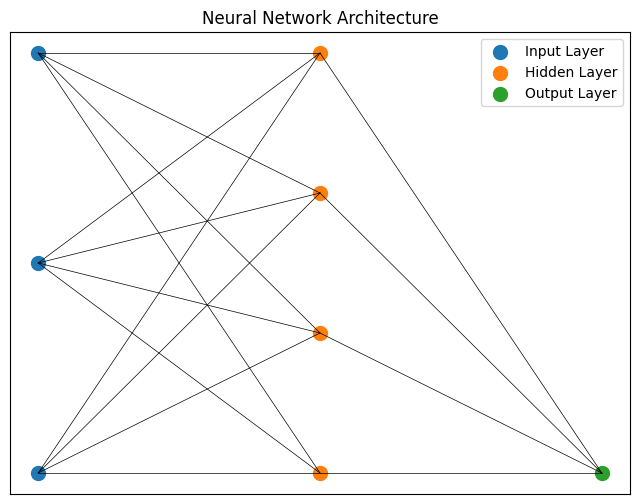

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the network architecture
input_size = 3
hidden_size = 4
output_size = 1

# Function to draw the neural network
def draw_neural_network(ax, input_size, hidden_size, output_size):
    # Define node positions
    input_layer_x = np.full(input_size, 0.1)
    input_layer_y = np.linspace(0, 1, input_size)

    hidden_layer_x = np.full(hidden_size, 0.5)
    hidden_layer_y = np.linspace(0, 1, hidden_size)

    output_layer_x = np.full(output_size, 0.9)
    output_layer_y = np.linspace(0, 1, output_size)

    # Draw nodes
    ax.scatter(input_layer_x, input_layer_y, s=100, label='Input Layer')
    ax.scatter(hidden_layer_x, hidden_layer_y, s=100, label='Hidden Layer')
    ax.scatter(output_layer_x, output_layer_y, s=100, label='Output Layer')

    # Draw edges
    for i in range(input_size):
        for j in range(hidden_size):
            ax.plot([input_layer_x[i], hidden_layer_x[j]], [input_layer_y[i], hidden_layer_y[j]], 'k-', lw=0.5)

    for j in range(hidden_size):
        for k in range(output_size):
            ax.plot([hidden_layer_x[j], output_layer_x[k]], [hidden_layer_y[j], output_layer_y[k]], 'k-', lw=0.5)

    # Set the labels and title
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend()
    ax.set_title('Neural Network Architecture')

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
draw_neural_network(ax, input_size, hidden_size, output_size)
plt.show()


Epoch 0, Loss: 0.7481064686839132
Epoch 1000, Loss: 0.06634774899995195
Epoch 2000, Loss: 0.04682481471892117
Epoch 3000, Loss: 0.03825329810750286
Epoch 4000, Loss: 0.032969429723862784
Epoch 5000, Loss: 0.029252561533471527
Epoch 6000, Loss: 0.02646987032413393
Epoch 7000, Loss: 0.024305842109666163
Epoch 8000, Loss: 0.022572810714755143
Epoch 9000, Loss: 0.021150495883887833


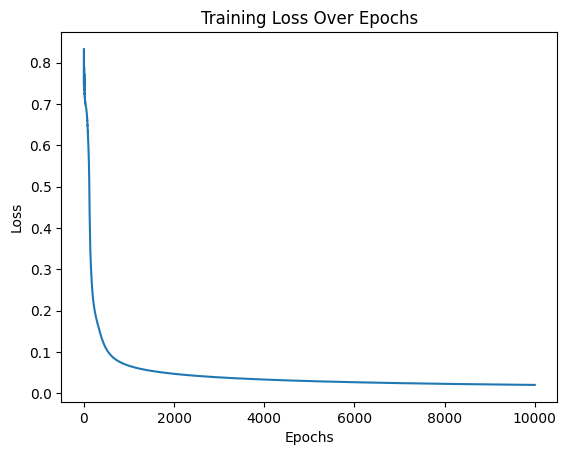

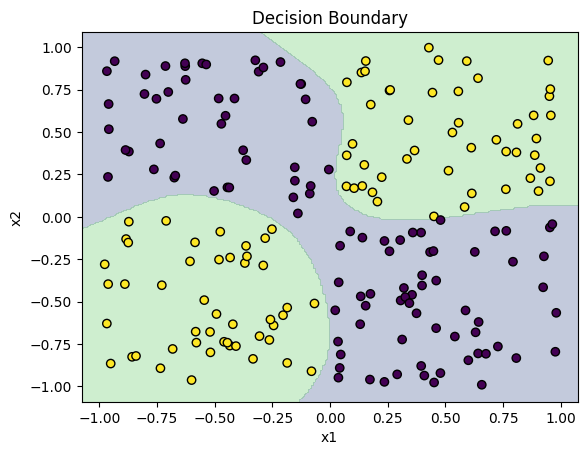

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Loss function: Binary Cross-Entropy
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Generate synthetic dataset
np.random.seed(0)
num_samples = 200
X = np.random.rand(num_samples, 2) * 2 - 1  # Generate points in the range [-1, 1]
y = (X[:, 0] * X[:, 1] > 0).astype(int).reshape(-1, 1)  # Label: 1 if x1 * x2 > 0 else 0

# Network parameters
input_size = 2
hidden_size = 4
output_size = 1
epochs = 10000
learning_rate = 0.1

# Initialize weights and biases
weights_input_hidden = np.random.rand(input_size, hidden_size)
bias_hidden = np.random.rand(hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)
bias_output = np.random.rand(output_size)

# Training the neural network
losses = []

for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # Compute loss
    loss = binary_cross_entropy(y, final_output)
    losses.append(loss)

    # Backward pass
    error_output = y - final_output
    delta_output = error_output * sigmoid_derivative(final_output)

    error_hidden = np.dot(delta_output, weights_hidden_output.T)
    delta_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update weights and biases
    weights_hidden_output += learning_rate * np.dot(hidden_output.T, delta_output)
    bias_output += learning_rate * np.sum(delta_output, axis=0)
    weights_input_hidden += learning_rate * np.dot(X.T, delta_hidden)
    bias_hidden += learning_rate * np.sum(delta_hidden, axis=0)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plotting the loss over epochs
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

# Testing the neural network
def predict(x):
    hidden_input = np.dot(x, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)
    return final_output > 0.5  # Return class 1 if the output is greater than 0.5

# Plotting decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]
predictions = predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, predictions, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor='k', marker='o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary')
plt.show()


Network Training: The neural network is trained using gradient descent to minimize binary cross-entropy loss.
Visualization: The training loss is plotted over epochs, and the decision boundary is visualized to show how the network classifies the data points.
Prediction: The predict function allows classifying new data points based on the trained network.


Simple Perceptron for Spam Detection

In [5]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Generate synthetic dataset for email spam detection
# Features: [contains_free, contains_win, contains_money, length_of_email]
# Labels: 1 for spam, 0 for not spam
X = np.array([
    [1, 1, 1, 20],  # Spam
    [0, 0, 1, 15],  # Spam
    [1, 0, 0, 10],  # Spam
    [0, 1, 0, 50],  # Not Spam
    [0, 0, 0, 30],  # Not Spam
    [1, 1, 0, 5],   # Spam
    [0, 0, 1, 45],  # Spam
    [0, 0, 0, 70],  # Not Spam
    [0, 1, 0, 35],  # Not Spam
    [1, 0, 1, 25]   # Spam
])
y = np.array([[1], [1], [1], [0], [0], [1], [1], [0], [0], [1]])

# Normalize the length_of_email feature
X[:, 3] = X[:, 3] / 100

# Network parameters
input_size = 4
output_size = 1
epochs = 10000
learning_rate = 0.1

# Initialize weights and biases
weights = np.random.rand(input_size, output_size)
bias = np.random.rand(output_size)

# Training the perceptron
for epoch in range(epochs):
    # Forward pass
    weighted_sum = np.dot(X, weights) + bias
    output = sigmoid(weighted_sum)

    # Compute loss
    loss = y - output

    # Backward pass
    adjustments = loss * sigmoid_derivative(output)
    weights += learning_rate * np.dot(X.T, adjustments)
    bias += learning_rate * np.sum(adjustments)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {np.mean(np.abs(loss))}")

# Function to extract features from an email
def extract_features_from_email(email):
    # Define keywords
    keywords = ["free", "win", "money"]

    # Initialize features
    features = np.zeros(4)

    # Check for presence of keywords
    email_lower = email.lower()
    features[0] = 1 if "free" in email_lower else 0
    features[1] = 1 if "win" in email_lower else 0
    features[2] = 1 if "money" in email_lower else 0

    # Length of the email
    features[3] = len(email)

    # Normalize the length feature
    features[3] = features[3] / 100

    return features

# Function to classify an email
def classify_email(email):
    features = extract_features_from_email(email)
    weighted_sum = np.dot(features, weights) + bias
    output = sigmoid(weighted_sum)
    return 1 if output > 0.5 else 0

# Example email
email = "Congratulations! You've won a free ticket. Click here to claim your prize."

# Classify the example email
result = classify_email(email)
print(f"Email classified as: {'Spam' if result == 1 else 'Not Spam'}")

# Display the features extracted from the email
features = extract_features_from_email(email)
print("Extracted Features:")
print(f"Contains 'free': {features[0]}")
print(f"Contains 'win': {features[1]}")
print(f"Contains 'money': {features[2]}")
print(f"Length of email (normalized): {features[3]}")

# Show how features are passed to the hidden layer and processed through activation
hidden_input = np.dot(features, weights) + bias
hidden_output = sigmoid(hidden_input)
print(f"Hidden Layer Input: {hidden_input}")
print(f"Hidden Layer Output (after activation): {hidden_output}")


Epoch 0, Loss: 0.4124261866802943
Epoch 1000, Loss: 0.06892170459920059
Epoch 2000, Loss: 0.04666971963016488
Epoch 3000, Loss: 0.03732325698665877
Epoch 4000, Loss: 0.031915952411950235
Epoch 5000, Loss: 0.028298150611255873
Epoch 6000, Loss: 0.025665605274238328
Epoch 7000, Loss: 0.02364196433952091
Epoch 8000, Loss: 0.022025009225323366
Epoch 9000, Loss: 0.0206952913225103
Email classified as: Spam
Extracted Features:
Contains 'free': 1.0
Contains 'win': 0.0
Contains 'money': 0.0
Length of email (normalized): 0.74
Hidden Layer Input: [4.75097547]
Hidden Layer Output (after activation): [0.99143081]


Feature Extraction:

We check for the presence of specific keywords ("free", "win", "money") in the email.
We calculate the length of the email and normalize it.
Forward Pass through the Perceptron:

The extracted features are passed through the perceptron to compute the weighted sum.
The weighted sum is then passed through the sigmoid activation function to get the output.
Classification Decision:

If the output of the sigmoid function is greater than 0.5, the email is classified as spam; otherwise, it's classified as not spam.

Display for Customers:

The script prints the extracted features.
It shows the values at each stage of the perceptron's forward pass.

Presence of the word "free": 1 if present, 0 if not.
Presence of the word "win": 1 if present, 0 if not.
Presence of the word "money": 1 if present, 0 if not.
Length of the email: The number of words in the email
The first row [1, 1, 1, 20] represents an email that contains the words "free", "win", and "money", and has a length of 20 words. This email is labeled as spam.
The fourth row [0, 1, 0, 50] represents an email that contains the word "win", does not contain "free" or "money", and has a length of 50 words. This email is labeled as not spam.
1 for spam emails.
0 for not spam emails.
The first label [1] corresponds to the first email in X and indicates that it is a spam email.
The fourth label [0] corresponds to the fourth email in X and indicates that it is not a spam email.

This line of code normalizes the length_of_email feature. Normalization is the process of scaling individual features to a fixed range, typically [0, 1]. This is done to ensure that all features contribute equally to the training process and to avoid biasing the model towards features with larger values.
Selects the fourth column of X (which represents the length_of_email feature).
Divides each value in this column by 100 to scale the values to a range closer to [0, 1]
The first email's length changes from 20 to 0.2.
The fourth email's length changes from 50 to 0.5.

Multiple Data

In [6]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Generate synthetic dataset for email spam detection
# Features: [contains_free, contains_win, contains_money, length_of_email]
# Labels: 1 for spam, 0 for not spam
X = np.array([
    [1, 1, 1, 20],  # Spam
    [0, 0, 1, 15],  # Spam
    [1, 0, 0, 10],  # Spam
    [0, 1, 0, 50],  # Not Spam
    [0, 0, 0, 30],  # Not Spam
    [1, 1, 0, 5],   # Spam
    [0, 0, 1, 45],  # Spam
    [0, 0, 0, 70],  # Not Spam
    [0, 1, 0, 35],  # Not Spam
    [1, 0, 1, 25]   # Spam
])
y = np.array([[1], [1], [1], [0], [0], [1], [1], [0], [0], [1]])

# Normalize the length_of_email feature
X[:, 3] = X[:, 3] / 100

# Network parameters
input_size = 4
output_size = 1
epochs = 10000
learning_rate = 0.1

# Initialize weights and biases
weights = np.random.rand(input_size, output_size)
bias = np.random.rand(output_size)

# Training the perceptron
for epoch in range(epochs):
    # Forward pass
    weighted_sum = np.dot(X, weights) + bias
    output = sigmoid(weighted_sum)

    # Compute loss
    loss = y - output

    # Backward pass
    adjustments = loss * sigmoid_derivative(output)
    weights += learning_rate * np.dot(X.T, adjustments)
    bias += learning_rate * np.sum(adjustments)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {np.mean(np.abs(loss))}")

# Function to extract features from an email
def extract_features_from_email(email):
    # Define keywords
    keywords = ["free", "win", "money"]

    # Initialize features
    features = np.zeros(4)

    # Check for presence of keywords
    email_lower = email.lower()
    features[0] = 1 if "free" in email_lower else 0
    features[1] = 1 if "win" in email_lower else 0
    features[2] = 1 if "money" in email_lower else 0

    # Length of the email
    features[3] = len(email)

    # Normalize the length feature
    features[3] = features[3] / 100

    return features

# Function to classify an email
def classify_email(email):
    features = extract_features_from_email(email)
    weighted_sum = np.dot(features, weights) + bias
    output = sigmoid(weighted_sum)
    return 1 if output > 0.5 else 0

# Function to classify multiple emails
def classify_multiple_emails(emails):
    for i, email in enumerate(emails):
        result = classify_email(email)
        print(f"Email {i + 1} classified as: {'Spam' if result == 1 else 'Not Spam'}")
        features = extract_features_from_email(email)
        print("Extracted Features:")
        print(f"Contains 'free': {features[0]}")
        print(f"Contains 'win': {features[1]}")
        print(f"Contains 'money': {features[2]}")
        print(f"Length of email (normalized): {features[3]}")
        hidden_input = np.dot(features, weights) + bias
        hidden_output = sigmoid(hidden_input)
        print(f"Hidden Layer Input: {hidden_input}")
        print(f"Hidden Layer Output (after activation): {hidden_output}")
        print()

# Example emails
test_emails = [
    "Congratulations! You've won a free ticket. Click here to claim your prize.",
    "Your account statement is available. Please review the attached document.",
    "Win a million dollars now! Just click this link to participate.",
    "Hi John, can we reschedule our meeting to next week?",
    "This is your last chance to claim your free trial. Hurry up!",
    "Important notice: Your account will be suspended if you do not verify your details."
]

# Classify the example emails
classify_multiple_emails(test_emails)


Epoch 0, Loss: 0.38925766816009716
Epoch 1000, Loss: 0.06866231914272973
Epoch 2000, Loss: 0.04658312924494547
Epoch 3000, Loss: 0.03727752424841561
Epoch 4000, Loss: 0.03188680020336629
Epoch 5000, Loss: 0.028277559334159354
Epoch 6000, Loss: 0.025650089903067087
Epoch 7000, Loss: 0.023629742521217287
Epoch 8000, Loss: 0.022015064663733392
Epoch 9000, Loss: 0.02068699747607198
Email 1 classified as: Spam
Extracted Features:
Contains 'free': 1.0
Contains 'win': 0.0
Contains 'money': 0.0
Length of email (normalized): 0.74
Hidden Layer Input: [4.39364261]
Hidden Layer Output (after activation): [0.98779516]

Email 2 classified as: Not Spam
Extracted Features:
Contains 'free': 0.0
Contains 'win': 0.0
Contains 'money': 0.0
Length of email (normalized): 0.73
Hidden Layer Input: [-3.05980886]
Hidden Layer Output (after activation): [0.04479588]

Email 3 classified as: Not Spam
Extracted Features:
Contains 'free': 0.0
Contains 'win': 1.0
Contains 'money': 0.0
Length of email (normalized): 0.6